# 範例 : (Kaggle)房價預測
以下用房價預測資料, 觀察去除離群值的影響 <br />
## [教學目標]
以下用房價預測資料, 觀察去除離群值的影響 <br />
## [範例重點]
觀察原始數值的散佈圖, 以及線性迴歸分數 <br />
觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 <br />
觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 <br />

In [16]:
#import the modules we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
data_dir = './data/'

house_train_df = pd.read_csv(data_dir + 'train.csv')

#remove the skewness of label
house_train_label = np.log1p(house_train_df.SalePrice)
house_train_df = house_train_df.drop(['Id','SalePrice'], axis = 1)
house_train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [17]:
#Getting the numerical features in house train dataframe
house_numerical_features  = house_train_df.columns[house_train_df.dtypes != 'object']
print(f' {len(house_numerical_features)} Numerical Features : {house_numerical_features} \n')

 36 Numerical Features : Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object') 



In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

house_train_numerical_df = house_train_df[house_numerical_features]
house_train_numerical_df = house_train_numerical_df.fillna(-1)
MMScaler = MinMaxScaler()
house_train_numerical_df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


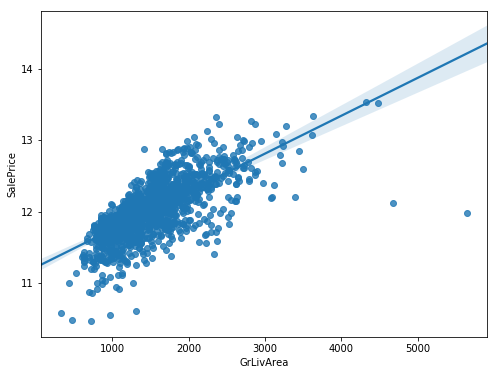

0.8499463091778436

In [19]:
# plot the scatter image between GrLivArea & SalePrice
import seaborn as sns

plt.figure(figsize = (8,6))
#Regression plot between GrLivArea & SalePrice -> which can visualize the linear relationship between these 2 datas
sns.regplot(x = house_train_numerical_df['GrLivArea'], y = house_train_label)
plt.show()

house_train_x = MMScaler.fit_transform(house_train_numerical_df)
LR = LinearRegression()
cross_val_score(LR,house_train_x,house_train_label,cv=5).mean()

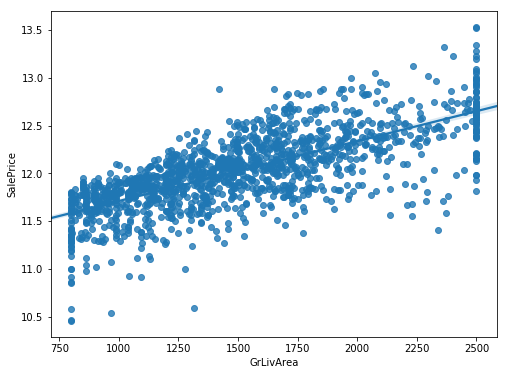

0.8590286613713278

In [20]:
house_train_numerical_df.GrLivArea = house_train_numerical_df['GrLivArea'].clip(800,2500)
plt.figure(figsize = (8,6))
sns.regplot( x = house_train_numerical_df.GrLivArea, y = house_train_label )
plt.show()

house_train_x = MMScaler.fit_transform(house_train_numerical_df)
LR = LinearRegression()
cross_val_score(LR,house_train_x,house_train_label,cv=5).mean()

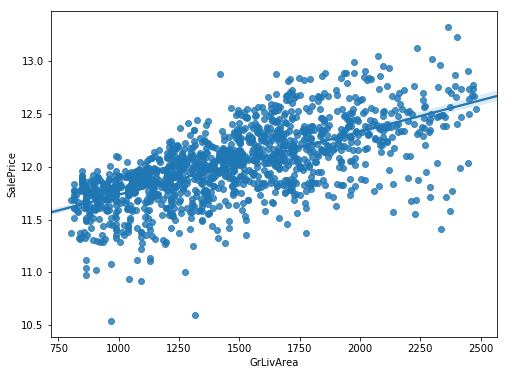

0.876503217899495

In [21]:
#recover the data to original values
house_train_numerical_df.GrLivArea = house_train_df.GrLivArea
keep_indices = (house_train_numerical_df.GrLivArea > 800) & (house_train_numerical_df.GrLivArea < 2500)
house_train_numerical_df = house_train_numerical_df[keep_indices]
temp_house_train_label = house_train_label[keep_indices]
plt.figure(figsize = (8,6))
sns.regplot( x = house_train_numerical_df.GrLivArea, y = temp_house_train_label )
plt.show()

house_train_x = MMScaler.fit_transform(house_train_numerical_df)
LR = LinearRegression()
cross_val_score(LR,house_train_x,temp_house_train_label, cv=5).mean()

# 作業1
試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數? <br />
# 作業2
續前題, 去除離群值有兩類方式 : 捨棄離群值(刪除離群的資料) 以及調整離群值 <br />
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。 <br />

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64 



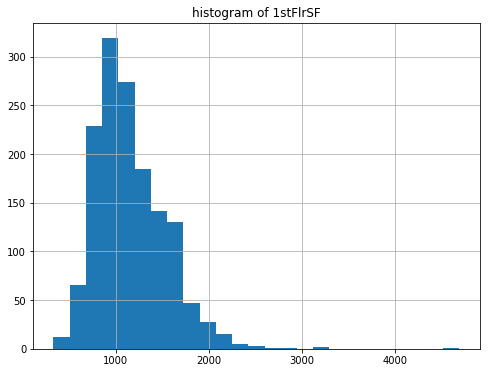

In [30]:
df = house_train_df[house_numerical_features]
df = df.fillna(-1)
#Let check the value first 
print(df['1stFlrSF'].describe(),'\n')

plt.figure(figsize = (8,6))
df['1stFlrSF'].hist(bins = 25)
plt.title('histogram of 1stFlrSF')
plt.show()

**From the histogram above, we can see that the values bigger than 2000 and smaller than 500 might be reasonable threshold to limit our data**

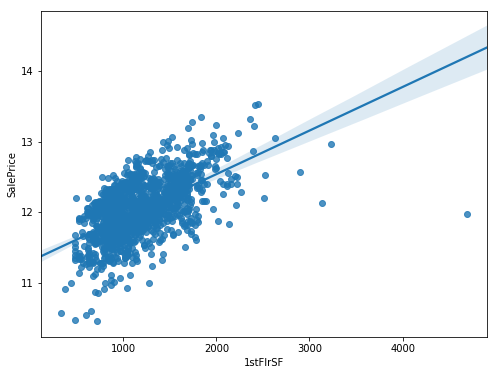

In [31]:
#Let`s see the original regplot 
plt.figure(figsize = (8,6))
sns.regplot( x = df['1stFlrSF'] , y = house_train_label)
plt.show()

## 作業1
試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數? 

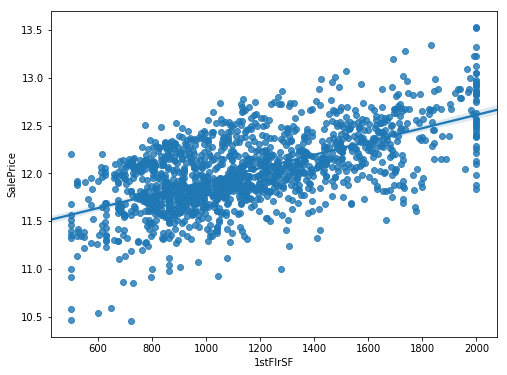

0.876580486010791

In [32]:
df['1stFlrSF'] = df['1stFlrSF'].clip(500,2000)
plt.figure(figsize = (8,6))
sns.regplot( x = df['1stFlrSF'], y = house_train_label)
plt.show()

house_train_x = MMScaler.fit_transform(df)
LR = LinearRegression()
cross_val_score(LR,house_train_x,house_train_label,cv=5).mean()

## 作業2
續前題, 去除離群值有兩類方式 : 捨棄離群值(刪除離群的資料) 以及調整離群值 <br />
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。  <br />

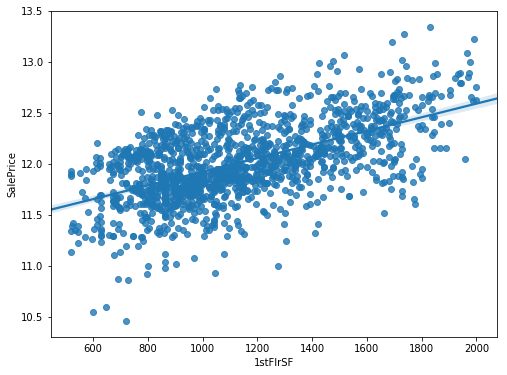

0.8859146819429483

In [33]:
df['1stFlrSF'] = house_train_df['1stFlrSF']
keep_indices = (df['1stFlrSF']>=500) & (df['1stFlrSF']<=2000)
df = df[keep_indices]
temp_house_train_label = house_train_label[keep_indices]

plt.figure(figsize=(8,6))
sns.regplot(x = df['1stFlrSF'], y = temp_house_train_label)
plt.show()

house_train_x = MMScaler.fit_transform(df)
LR = LinearRegression()
cross_val_score(LR,house_train_x,temp_house_train_label,cv=5).mean()

## Answer of HW2
From the above result, we can see that the dropping is better than clipping. This might due to the clipping will change the trend of data. Because we only clipped one of the column and others columns remains the same. This might destory the rationality of data.